In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import cufflinks as cf 
init_notebook_mode (connected=True)
cf.go_offline()
import plotly.express as px
import plotly.offline as pyo

In [338]:
##Import csv file
df = pd.read_csv (r'/content/NYPD_Arrest_Data__Year_to_Date_.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (2,4,9,10,14,17) have mixed types.Specify dtype option on import or set low_memory=False.



,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157,RAPE 1,104,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954.0,40.726187,-73.73523390399998,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263,"ARSON 2,3,4",114,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320.0,40.636868,-73.89158591899997,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594,OBSCENITY 1,116,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739.0,40.594145,-73.96041495199995,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263,"ARSON 2,3,4",114,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616.0,40.824340,-73.91036538099996,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667.0,40.843703,-73.92439508899997,POINT (-73.92439508899997 40.84370255600004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168890,222884924,01/10/2021,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605.0,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
168891,223918625,02/03/2021,792,WEAPONS POSSESSION 1 & 2,118,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941.0,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
168892,224323770,02/13/2021,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367.0,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
168893,222599533,01/04/2021,792,WEAPONS POSSESSION 1 & 2,118,DANGEROUS WEAPONS,PL 2650303,F,K,73,0,25-44,M,BLACK,1007524,188555.0,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)


In [339]:
df.shape

(168895, 19)

In [340]:
##Run descriptive stats on the data 
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157,RAPE 1,104,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954.0,40.726187,-73.73523390399998,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263,"ARSON 2,3,4",114,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320.0,40.636868,-73.89158591899997,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594,OBSCENITY 1,116,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739.0,40.594145,-73.96041495199995,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263,"ARSON 2,3,4",114,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616.0,40.824340,-73.91036538099996,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667.0,40.843703,-73.92439508899997,POINT (-73.92439508899997 40.84370255600004)
5,234117071,09/27/2021,157,RAPE 1,104,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK,989013,192652.0,40.695469,-73.98282507899995,POINT (-73.98282507899995 40.69546894100006)
6,233755503,09/18/2021,579,NaN,NaN,NaN,PL 2224002,F,Q,106,0,18-24,M,WHITE HISPANIC,1028607,187930.0,40.682398,-73.84007215799994,POINT (-73.84007215799994 40.68239827900004)
7,233740512,09/18/2021,157,RAPE 1,104,RAPE,PL 1303502,F,B,41,0,25-44,M,WHITE HISPANIC,1013232,236725.0,40.816392,-73.89529641399997,POINT (-73.89529641399997 40.816391847000034)
8,233697123,09/17/2021,157,RAPE 1,104,RAPE,PL 1303501,F,Q,105,0,25-44,M,BLACK,1057636,203954.0,40.726187,-73.73523390399998,POINT (-73.73523390399998 40.72618713000002)
9,233381184,09/10/2021,578,NaN,NaN,NaN,PL 2223001,M,Q,114,0,25-44,M,BLACK,1004347,220853.0,40.772852,-73.92744327199993,POINT (-73.92744327199993 40.77285219100002)


In [341]:
df.tail(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
168885,224526582,02/18/2021,49,U.S. CODE UNCLASSIFIED,995,FOR OTHER AUTHORITIES,FOA9000049,NaN,M,5,0,45-64,M,ASIAN / PACIFIC ISLANDER,984984,200116.0,40.715957,-73.997354,POINT (-73.997353676 40.71595711700007)
168886,222606798,01/05/2021,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,84,1,25-44,F,BLACK,989923,188795.0,40.684882,-73.979547,POINT (-73.97954667599998 40.68488182700002)
168887,222619887,01/05/2021,139,"MURDER,UNCLASSIFIED",101,MURDER & NON-NEGL. MANSLAUGHTE,PL 1252501,F,K,67,0,25-44,M,BLACK,997897,175677.0,40.648867,-73.950822,POINT (-73.95082189999994 40.64886713300007)
168888,222488090,01/01/2021,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,Q,115,0,25-44,M,WHITE HISPANIC,1023210,213254.0,40.751932,-73.859384,POINT (-73.85938445399995 40.75193190600004)
168889,223912130,02/03/2021,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL 1552500,M,B,45,0,45-64,M,WHITE HISPANIC,1028412,240992.0,40.828041,-73.840427,POINT (-73.84042672199998 40.82804069500003)
168890,222884924,01/10/2021,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605.0,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
168891,223918625,02/03/2021,792,WEAPONS POSSESSION 1 & 2,118,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941.0,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
168892,224323770,02/13/2021,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367.0,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
168893,222599533,01/04/2021,792,WEAPONS POSSESSION 1 & 2,118,DANGEROUS WEAPONS,PL 2650303,F,K,73,0,25-44,M,BLACK,1007524,188555.0,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)
168894,224056881,02/06/2021,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1451000,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031414,190787.0,40.690226,-73.829932,POINT (-73.82993153599993 40.69022556600004)


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168895 entries, 0 to 168894
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                168895 non-null  int64  
 1   ARREST_DATE               168895 non-null  object 
 2   PD_CD                     168863 non-null  object 
 3   PD_DESC                   168788 non-null  object 
 4   KY_CD                     168788 non-null  object 
 5   OFNS_DESC                 168788 non-null  object 
 6   LAW_CODE                  168895 non-null  object 
 7   LAW_CAT_CD                167400 non-null  object 
 8   ARREST_BORO               168895 non-null  object 
 9   ARREST_PRECINCT           168895 non-null  object 
 10  JURISDICTION_CODE         168895 non-null  object 
 11  AGE_GROUP                 168895 non-null  object 
 12  PERP_SEX                  168895 non-null  object 
 13  PERP_RACE                 168895 non-null  o

In [343]:
##Check for duplicated data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
168890    False
168891    False
168892    False
168893    False
168894    False
Length: 168895, dtype: bool

In [344]:
#Pull descriptive stats on the data set
df.describe()

,ARREST_KEY,Y_COORD_CD,Latitude
count,1.688950e+05,168894.000000,168894.000000
mean,2.299158e+08,208203.862019,40.737430
std,4.880533e+06,29945.152951,0.290720
min,8.480000e+02,40.881127,-73.864716
25%,2.253156e+08,185867.250000,40.676678
50%,2.299413e+08,207093.000000,40.735036
75%,2.341170e+08,235919.000000,40.814189
max,2.385139e+08,271820.000000,40.912723


In [345]:
##Pull columns available within the dataset
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
##Question: What age group had the most arrests for Arson?

In [346]:
##Drop unecessary columns
drop_cols=['PERP_SEX', 'PERP_RACE','X_COORD_CD','Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column','PD_CD','PD_DESC', 'KY_CD','LAW_CODE', 'LAW_CAT_CD','JURISDICTION_CODE','ARREST_BORO', 'ARREST_PRECINCT','ARREST_KEY', 'ARREST_DATE']
df.drop(drop_cols,inplace=True,axis=1)
df

,OFNS_DESC,AGE_GROUP
0,RAPE,18-24
1,ARSON,25-44
2,SEX CRIMES,25-44
3,ARSON,18-24
4,NaN,25-44
...,...,...
168890,ROBBERY,45-64
168891,DANGEROUS WEAPONS,18-24
168892,ASSAULT 3 & RELATED OFFENSES,45-64
168893,DANGEROUS WEAPONS,25-44


In [347]:
##Looking for the count of null values in the dataset
print(df.isnull().sum())

OFNS_DESC    107
AGE_GROUP      0
dtype: int64


In [348]:
##Replace Null values
df['OFNS_DESC'].fillna('UNKNOWN/NOT AVAILABLE/NOT REPORTED',inplace=True)
df

,OFNS_DESC,AGE_GROUP
0,RAPE,18-24
1,ARSON,25-44
2,SEX CRIMES,25-44
3,ARSON,18-24
4,UNKNOWN/NOT AVAILABLE/NOT REPORTED,25-44
...,...,...
168890,ROBBERY,45-64
168891,DANGEROUS WEAPONS,18-24
168892,ASSAULT 3 & RELATED OFFENSES,45-64
168893,DANGEROUS WEAPONS,25-44


In [349]:
##Confirming there are no more null values in the dataset
print(df.isnull().sum())

OFNS_DESC    0
AGE_GROUP    0
dtype: int64


In [350]:
##Rename the necessary columns
df.rename(columns={'OFNS_DESC':'OFFENSE_DESC'},inplace=True)
df

,OFFENSE_DESC,AGE_GROUP
0,RAPE,18-24
1,ARSON,25-44
2,SEX CRIMES,25-44
3,ARSON,18-24
4,UNKNOWN/NOT AVAILABLE/NOT REPORTED,25-44
...,...,...
168890,ROBBERY,45-64
168891,DANGEROUS WEAPONS,18-24
168892,ASSAULT 3 & RELATED OFFENSES,45-64
168893,DANGEROUS WEAPONS,25-44


In [351]:
##Filtering out Arson Offense and age group 
OFFENSE_BY_AGE = df[(df['OFFENSE_DESC']=='ARSON') & (df['AGE_GROUP'])]
OFFENSE_BY_AGE

,OFFENSE_DESC,AGE_GROUP
1,ARSON,25-44
3,ARSON,18-24
822,ARSON,25-44
1378,ARSON,18-24
1822,ARSON,25-44
...,...,...
164506,ARSON,18-24
165264,ARSON,25-44
165721,ARSON,25-44
167062,ARSON,25-44


In [352]:
##Pull the count of Arson by Age group
df_age=OFFENSE_BY_AGE["AGE_GROUP"].value_counts()
df_age

25-44    80
45-64    26
18-24    20
65+       6
<18       2
Name: AGE_GROUP, dtype: int64

In [353]:
##Create dataframe to summarize the total arson offenseby age group
data=[['<18',2],['18-24',20],['25-44',80],['45-65',26],['65+',6]]
df_arson_by_age_group=pd.DataFrame(data,columns=['Age_Group','Total'])
print(df_arson_by_age_group)

  Age_Group  Total
0       <18      2
1     18-24     20
2     25-44     80
3     45-65     26
4       65+      6


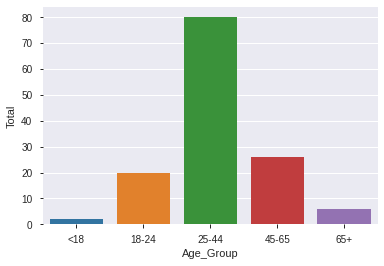

In [354]:
##Bargraph showing the total arson offense by age group
sns.barplot(x='Age_Group',y='Total', data=df_arson_by_age_group)

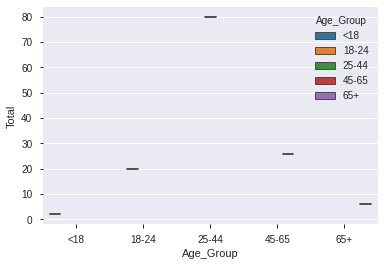

In [355]:
##Violin plot showing the total arson offense by age group
sns.violinplot(x='Age_Group',y='Total',hue='Age_Group',data=df_arson_by_age_group)

In [ ]:
##Answer the age group with the highest offense of Arson is 25-44 with under 18 being the lowest. 